## Climatology and Anomaly in Geoscience
An example of how Python is used to explore global sea surface temperature (SST).
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University
* Junior Colloquium, Nov. 09, 2020


## What's covered so far
1. Python basics: `number`, `string`, `list`, `function`, `module`, `package`, ...
2. Scientific computation: `numpy`, `scipy`
3. Data visualization: `matplotlib`
4. High-level and user-friendly packages: `pandas` and `xarray`

## Today's plan

1. A short introduction to `xarray`.
2. SST dataset.
3. Scientific questions to keep in mind.
4. Step-by-step data analysis using Python.


## What's `xarray`  able to do? 

<img src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" width="300">

1. Open/save datasets (single/multiple, local/remote): `open_dataset`, `open_mfdataset`.
2. Data selection: `sel`, `isel`.
3. Computation: `mean`, `std`, `max`, `min`, `differentiate`, `integrate`, ...
4. Split-apply-combine: `groupby`.
5. Plot: `plot`, `plot.line`, `plot.contourf`, `plot.hist` ...

http://xarray.pydata.org/

## SST data
* ERSST version 5: global **monthly** SST.
* $2^\circ$ longitude $\times$ $2^\circ$ latitude 
* From Columbia University [data library](http://iridl.ldeo.columbia.edu): http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X//lon/renameGRID/Y//lat/renameGRID/T//time/renameGRID/time/(days%20since%201979-01-01)/streamgridunitconvert%5Bzlev%5Daverage
* It covers 1854-present, but we focus on **1979-2018** today.
* Downloaded and available on the Adroit server:<br> `/home/wenchang/JC2020/ersst5_1979-2018.nc`

## Some scientific questions to keep in mind
1. What does global SST pattern look like?
2. Is SST getting warmer over the recent decades?
2. How do El Nino/La Nina vary during this period?
    
![](https://blog.weatherops.com/hubfs/blog-files/elnino-vs-lanina-noaa.jpg)
https://blog.weatherops.com/hubfs/blog-files/elnino-vs-lanina-noaa.jpg

## Start analysis

In [1]:
# xarray is the core package we are going to use
import xarray as xr
import matplotlib.pyplot as plt # we also use pyplot directly in some cases
import os

In [2]:
# some configurations on the default figure output
%config InlineBackend.figure_format ='retina'
plt.rcParams['figure.dpi'] = 120

## Open the SST data file
Use `xr.open_dataset` to open the SST data file.


In [3]:
# Am I running the notebook on Adroit or not?
if os.uname().nodename.startswith('adroit'):
    ifile = '/home/wenchang/JC2020/ersst5_1979-2018.nc'
else:
    ifile = 'ersst5_1979-2018.nc'
print('file to be opened:',ifile)
ds = xr.open_dataset(ifile)

file to be opened: ersst5_1979-2018.nc


In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 480)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Data variables:
    sst      (time, lat, lon) float32 ...

In [5]:
sst = ds.sst
sst

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
[7689600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes:
    pointwidth:          1.0
    long_name:           Extended reconstructed sea surface temperature
    units:               Celsius_scale
    standard_name:       sea_surface_temperature
    expires:             1604275200
    file_missing_value:  -999.0
    history:             Averaged over zlev=0.0 meters minimum 0.0% data present

## Explore the data by making simple plots

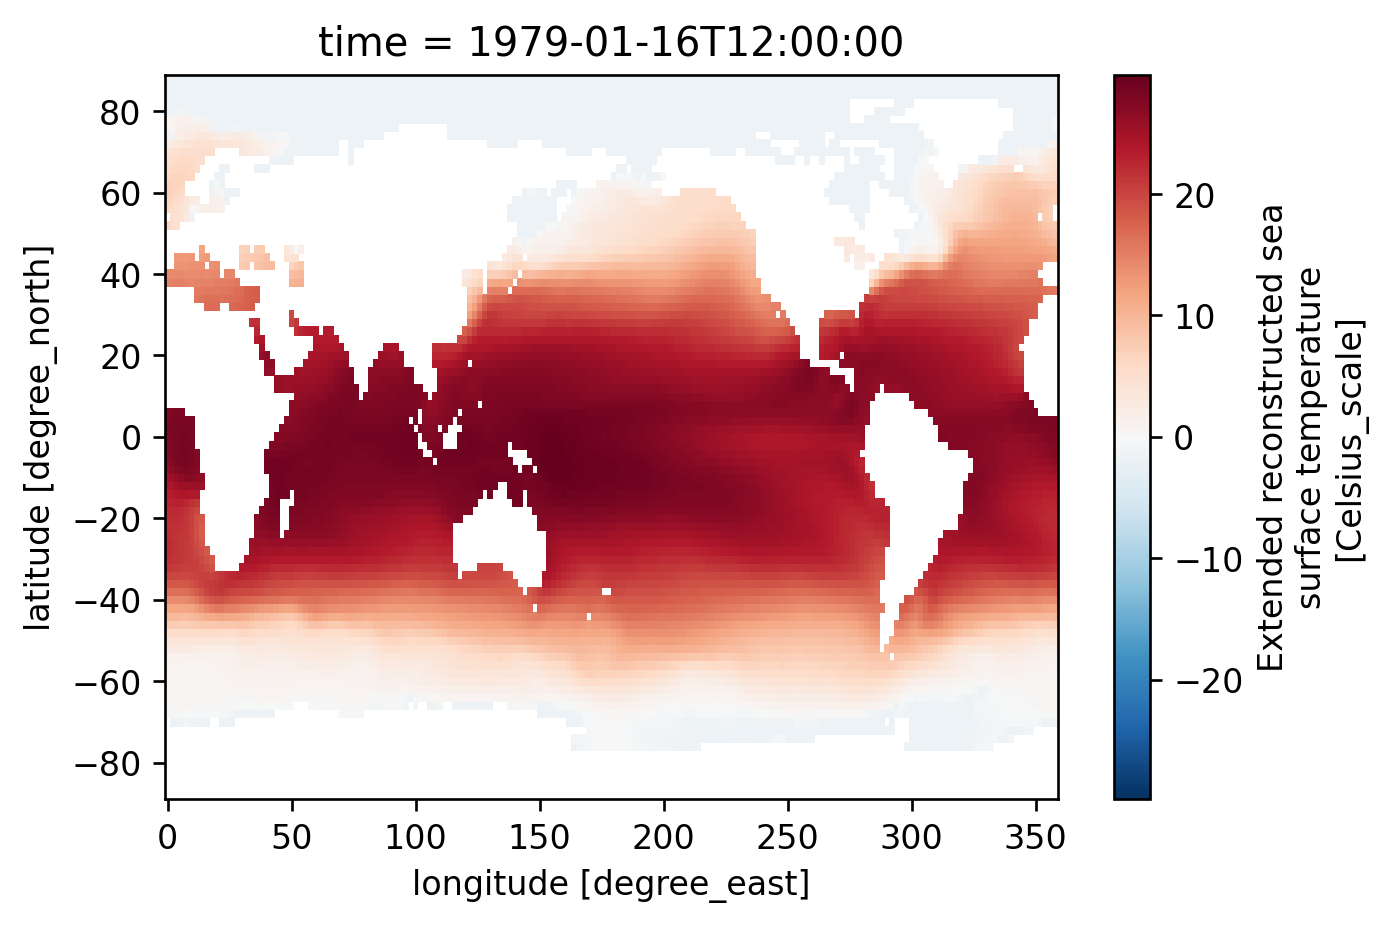

In [6]:
# first time point
sst.isel(time=0).plot()

More experiments on plotting:
* select date/time explicitly
* change colormap/levels
* contourf/contour


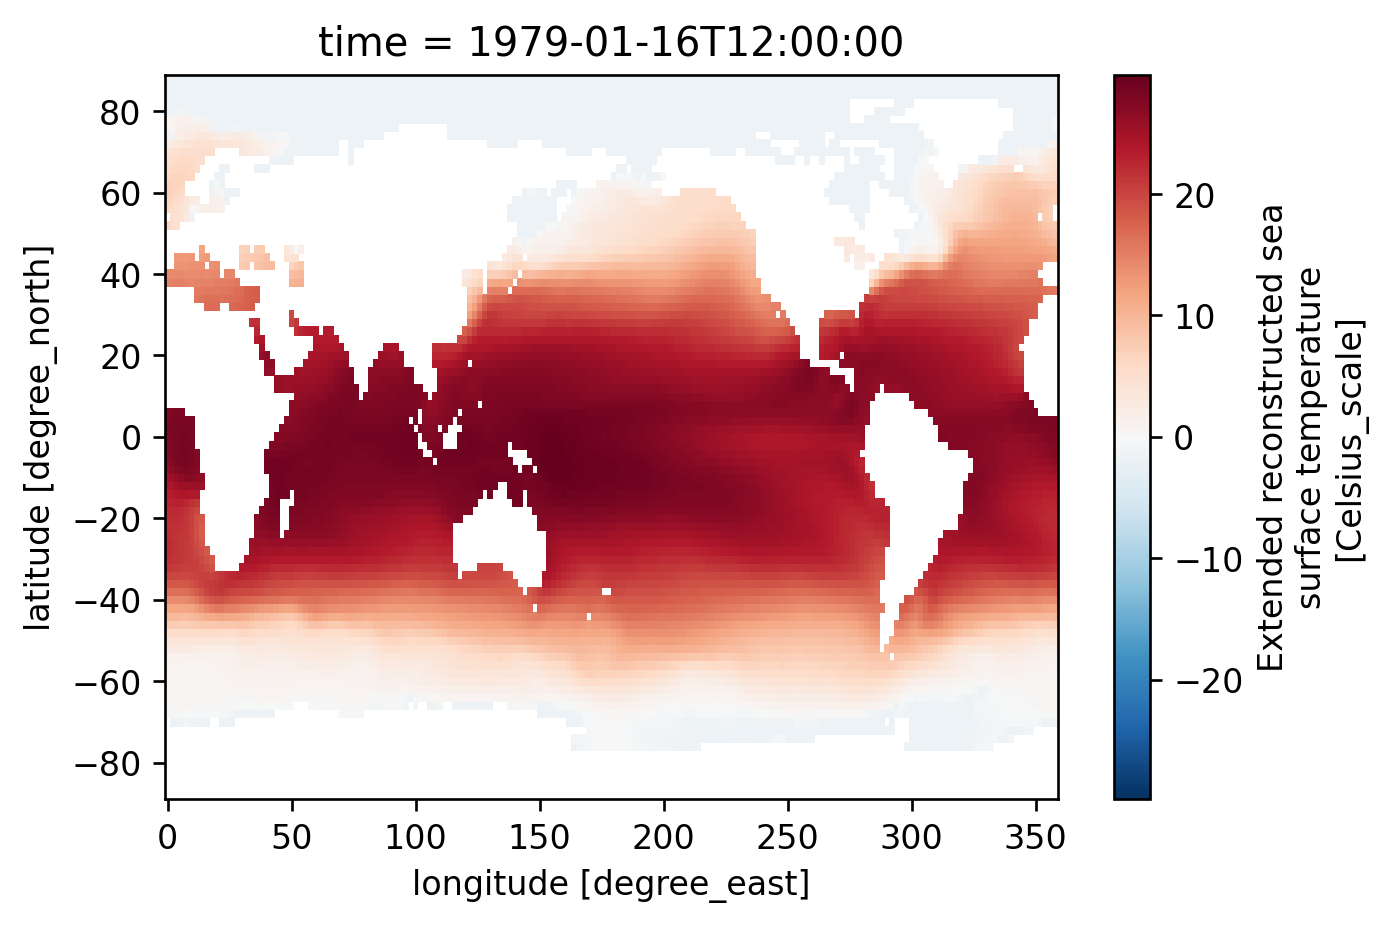

In [7]:
# specify date/time explicitly
# sst.isel(time=0).plot()
sst.sel(time='1979-01-16T12').plot()

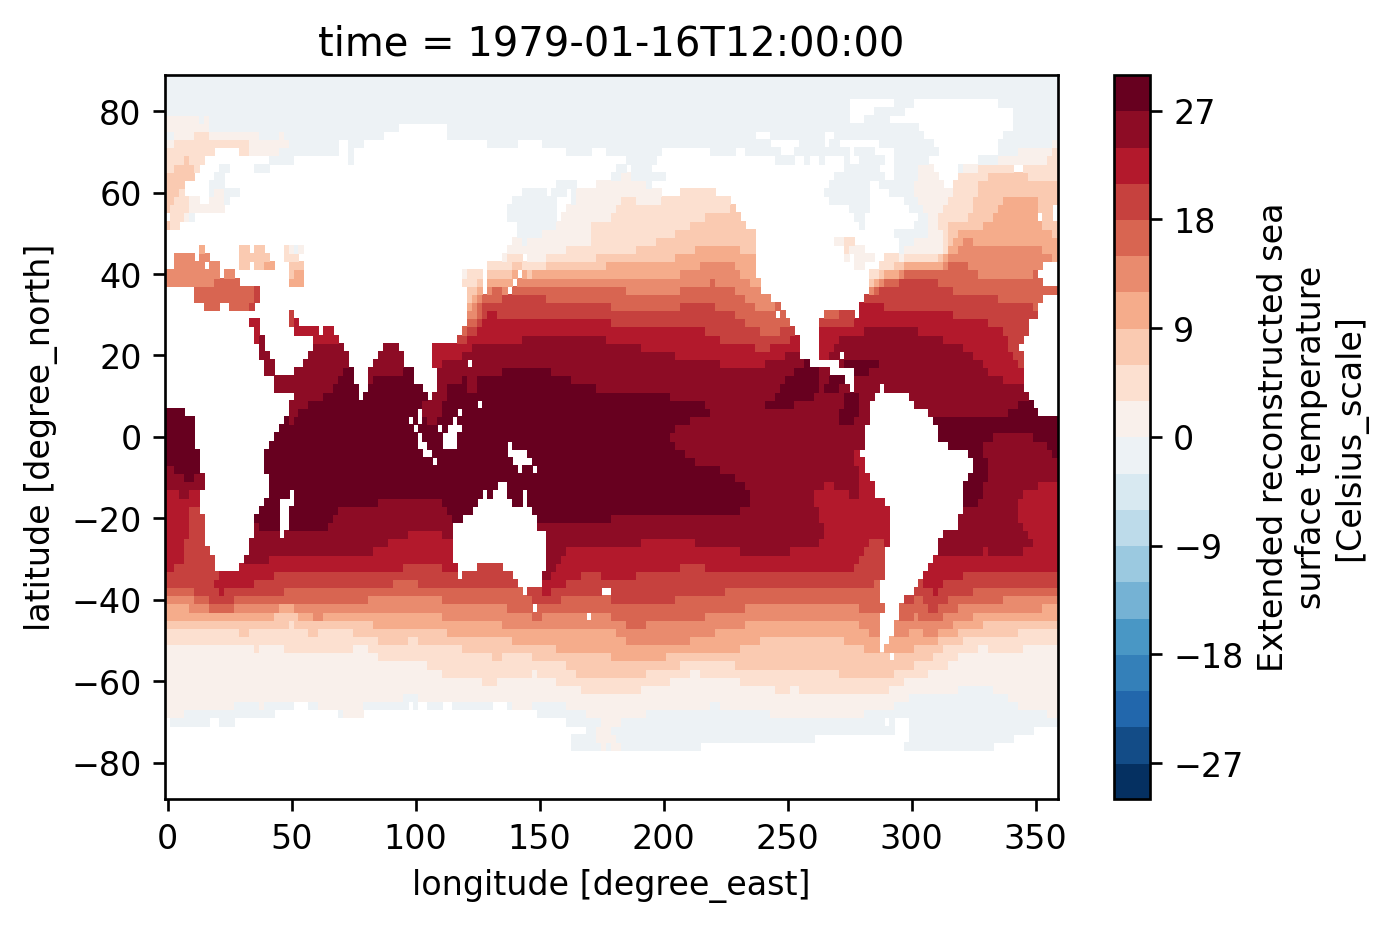

In [8]:
# change colormap levels
sst.sel(time='1979-01-16T12').plot(levels=21)

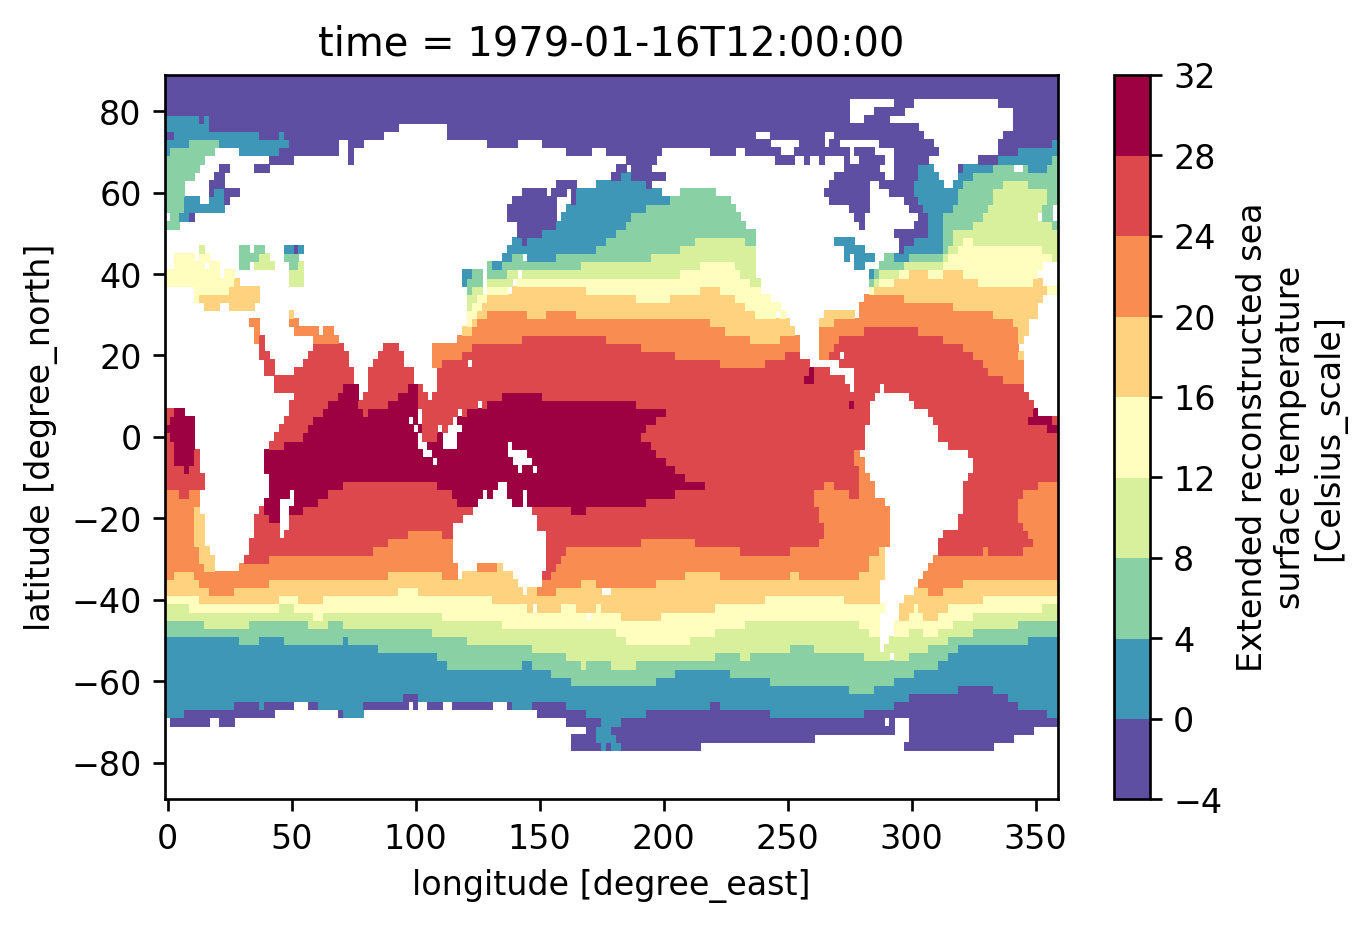

In [9]:
# change color map to 'Spectral_r'. 
# More colormaps: https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
sst.sel(time='1979-01-16T12').plot(levels=10, center=False, cmap='Spectral_r')

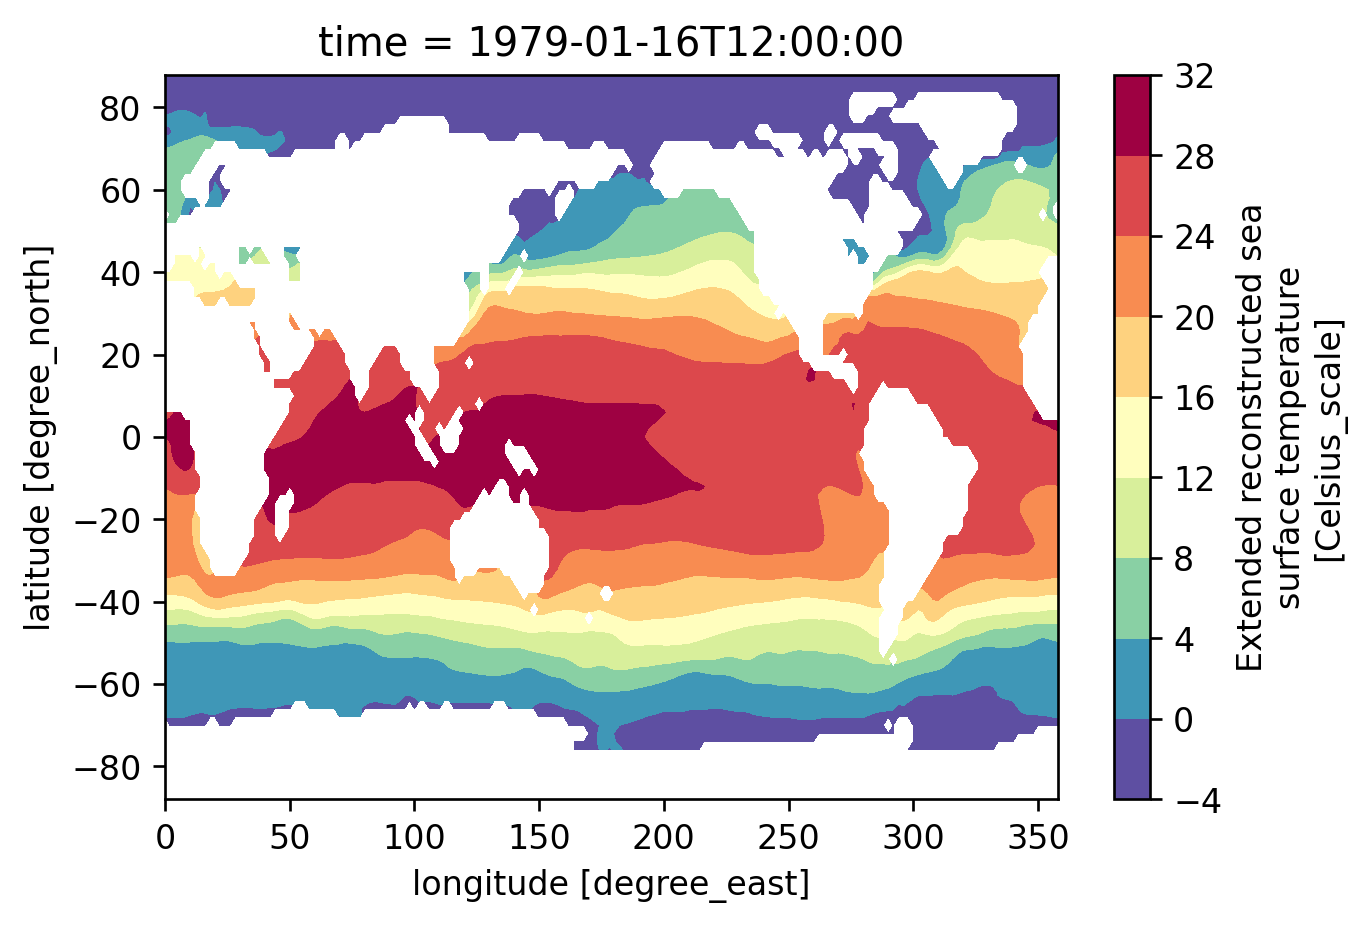

In [10]:
# change to contourf
sst.sel(time='1979-01-16T12').plot.contourf(levels=10, center=False, cmap='Spectral_r')

## 40-year annual mean climatology

In [11]:
sst_clim = sst.mean('time')

In [12]:
sst_clim

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7999686, -1.799723 , -1.7995721, ..., -1.799789 , -1.7998605,
        -1.7999344],
       [-1.7991427, -1.7990254, -1.7989469, ..., -1.7997802, -1.7994727,
        -1.7992976],
       [-1.7990803, -1.7990966, -1.7991083, ..., -1.7993528, -1.7991874,
        -1.7990723]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

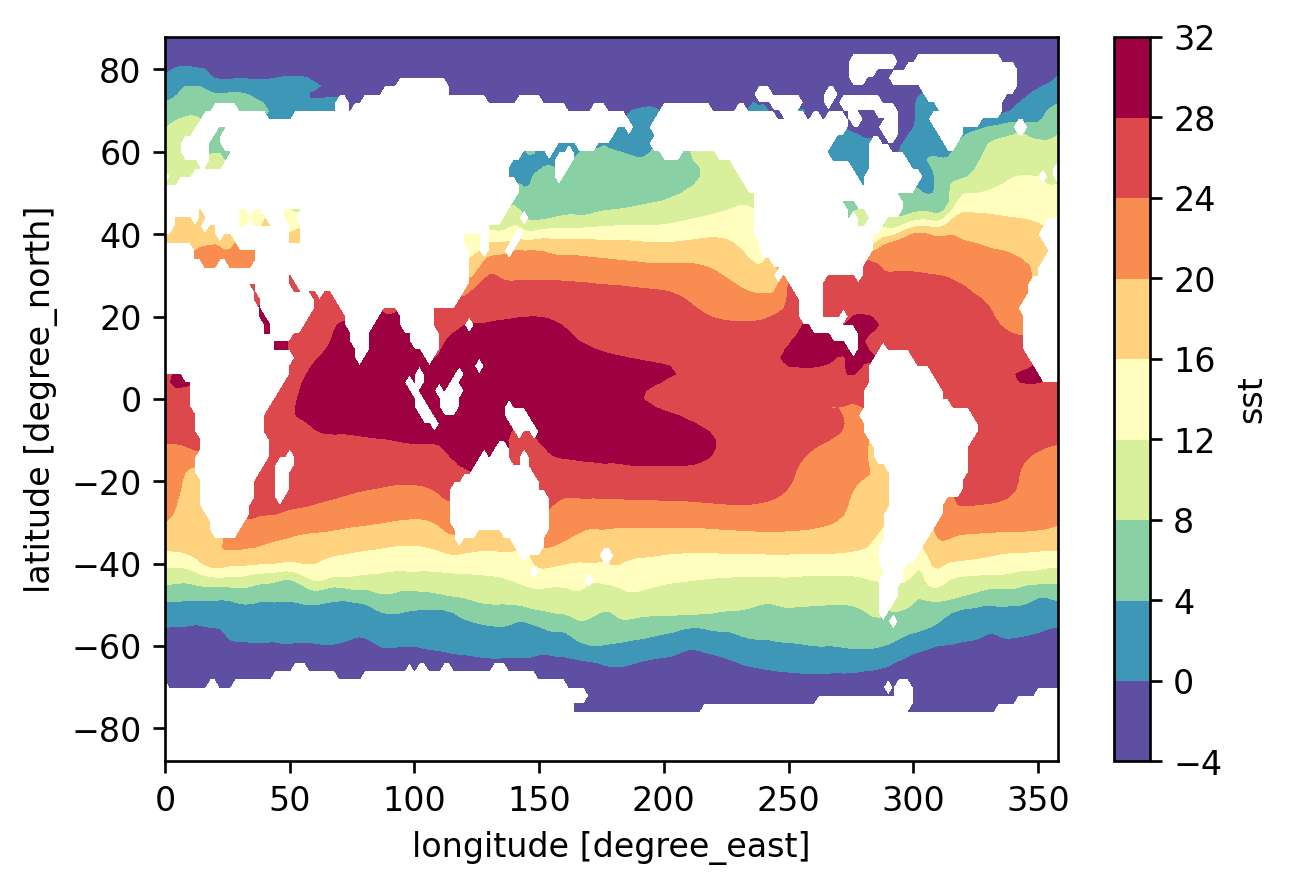

In [13]:
sst_clim.plot.contourf(levels=10, cmap='Spectral_r', center=False)

* Warm tropics and cold polar regions.
* Indo-Pacific Warm Pool.

## SST change from the first 10 years to the last 10 years

In [14]:
sst_early = sst.sel(time=slice('1979-01', '1988-12')).mean('time')
sst_late = sst.sel(time=slice('2009-01', '2018-12')).mean('time')
dsst = sst_late - sst_early
dsst.attrs['long_name'] = 'SST change from 1979-1988 to 2009-2018'
dsst.attrs['units'] = '$^\circ$C'

In [15]:
dsst

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [9.4175339e-05, 1.0762215e-03, 1.6802549e-03, ..., 7.9834461e-04,
        5.2642822e-04, 2.3126602e-04],
       [3.3977032e-03, 3.8667917e-03, 4.1812658e-03, ..., 8.4733963e-04,
        2.0782948e-03, 2.7782917e-03],
       [3.6476851e-03, 3.5823584e-03, 3.5355091e-03, ..., 2.5581121e-03,
        3.2191277e-03, 3.6793947e-03]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  SST change from 1979-1988 to 2009-2018
    units:      $^\circ$C

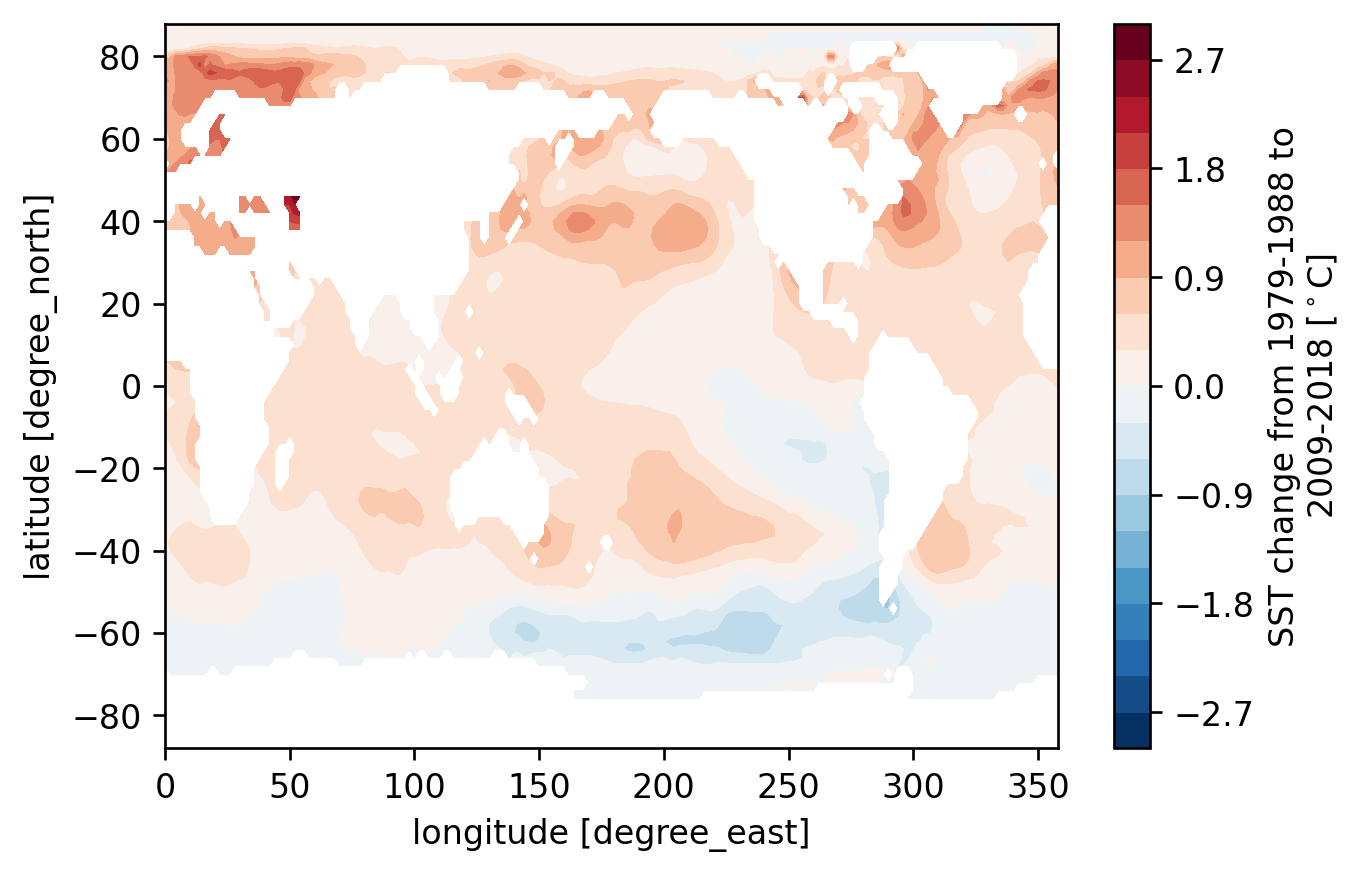

In [16]:
dsst.plot.contourf(levels=21)
# cooling over the Southern Ocean and Southeast Pacific

* Not warming everywhere. 
* Cooling over the Southern Ocean and Southeast Pacific

## Calculate monthly climatology
* multiple-year mean for each of the 12 months
* use the `groupby('time.month')` method



In [17]:
sst_mclim = sst.groupby('time.month').mean('time')
# the time dimension is replaced by month

In [18]:
sst_mclim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7999998, -1.7967713, -1.7949593, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7904856, -1.7887875, -1.7874559, ..., -1.7974577,
         -1.7940279, -1.7922757],
        [-1.7907732, -1.7902114, -1.7898309, ..., -1.794199 ,
         -1.7924855, -1.7912834]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7993208, -1.7996114, -1.7999998, ..., -1.7999998,
         -1.7997364, -1.7993886],
        [-1.7992064, -1.7993428, -1.7997385, ..., -1.7996912,
         -1.799461 , -1.7992189]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

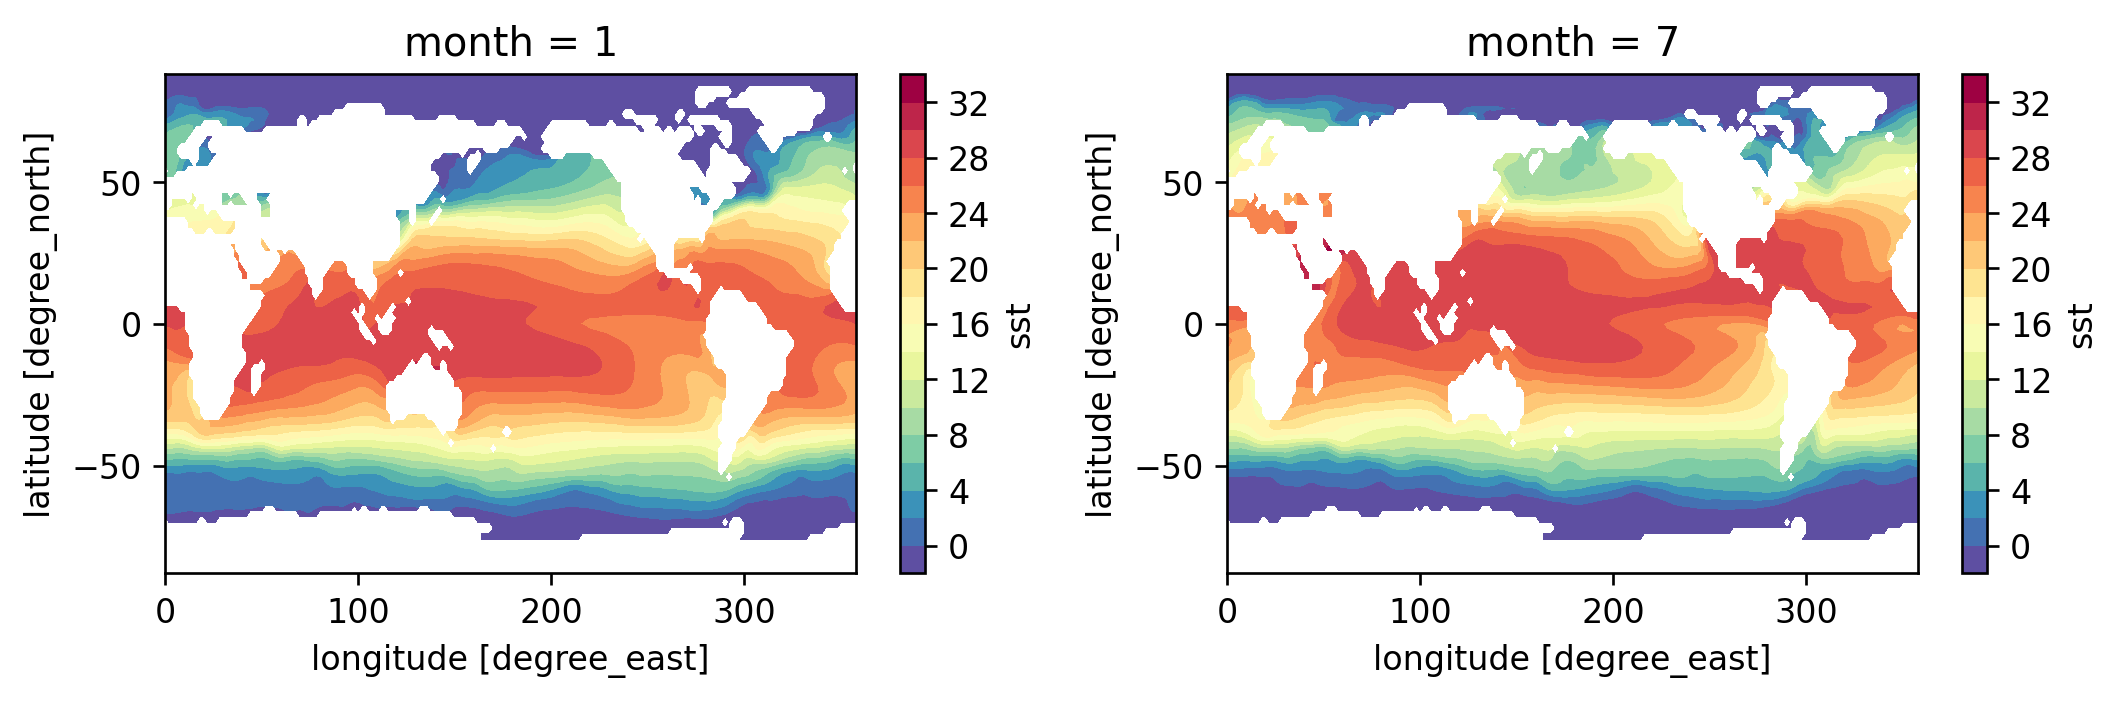

In [19]:
# Jan vs. Jul
fig, axes = plt.subplots(1, 2, figsize=(9,3))

sst_mclim.sel(month=1).plot.contourf(levels=range(-2,35, 2), cmap='Spectral_r', ax=axes[0])
sst_mclim.sel(month=7).plot.contourf(levels=range(-2,35, 2), cmap='Spectral_r', ax=axes[1])

fig.tight_layout()

Make 12 subplots using a single command.

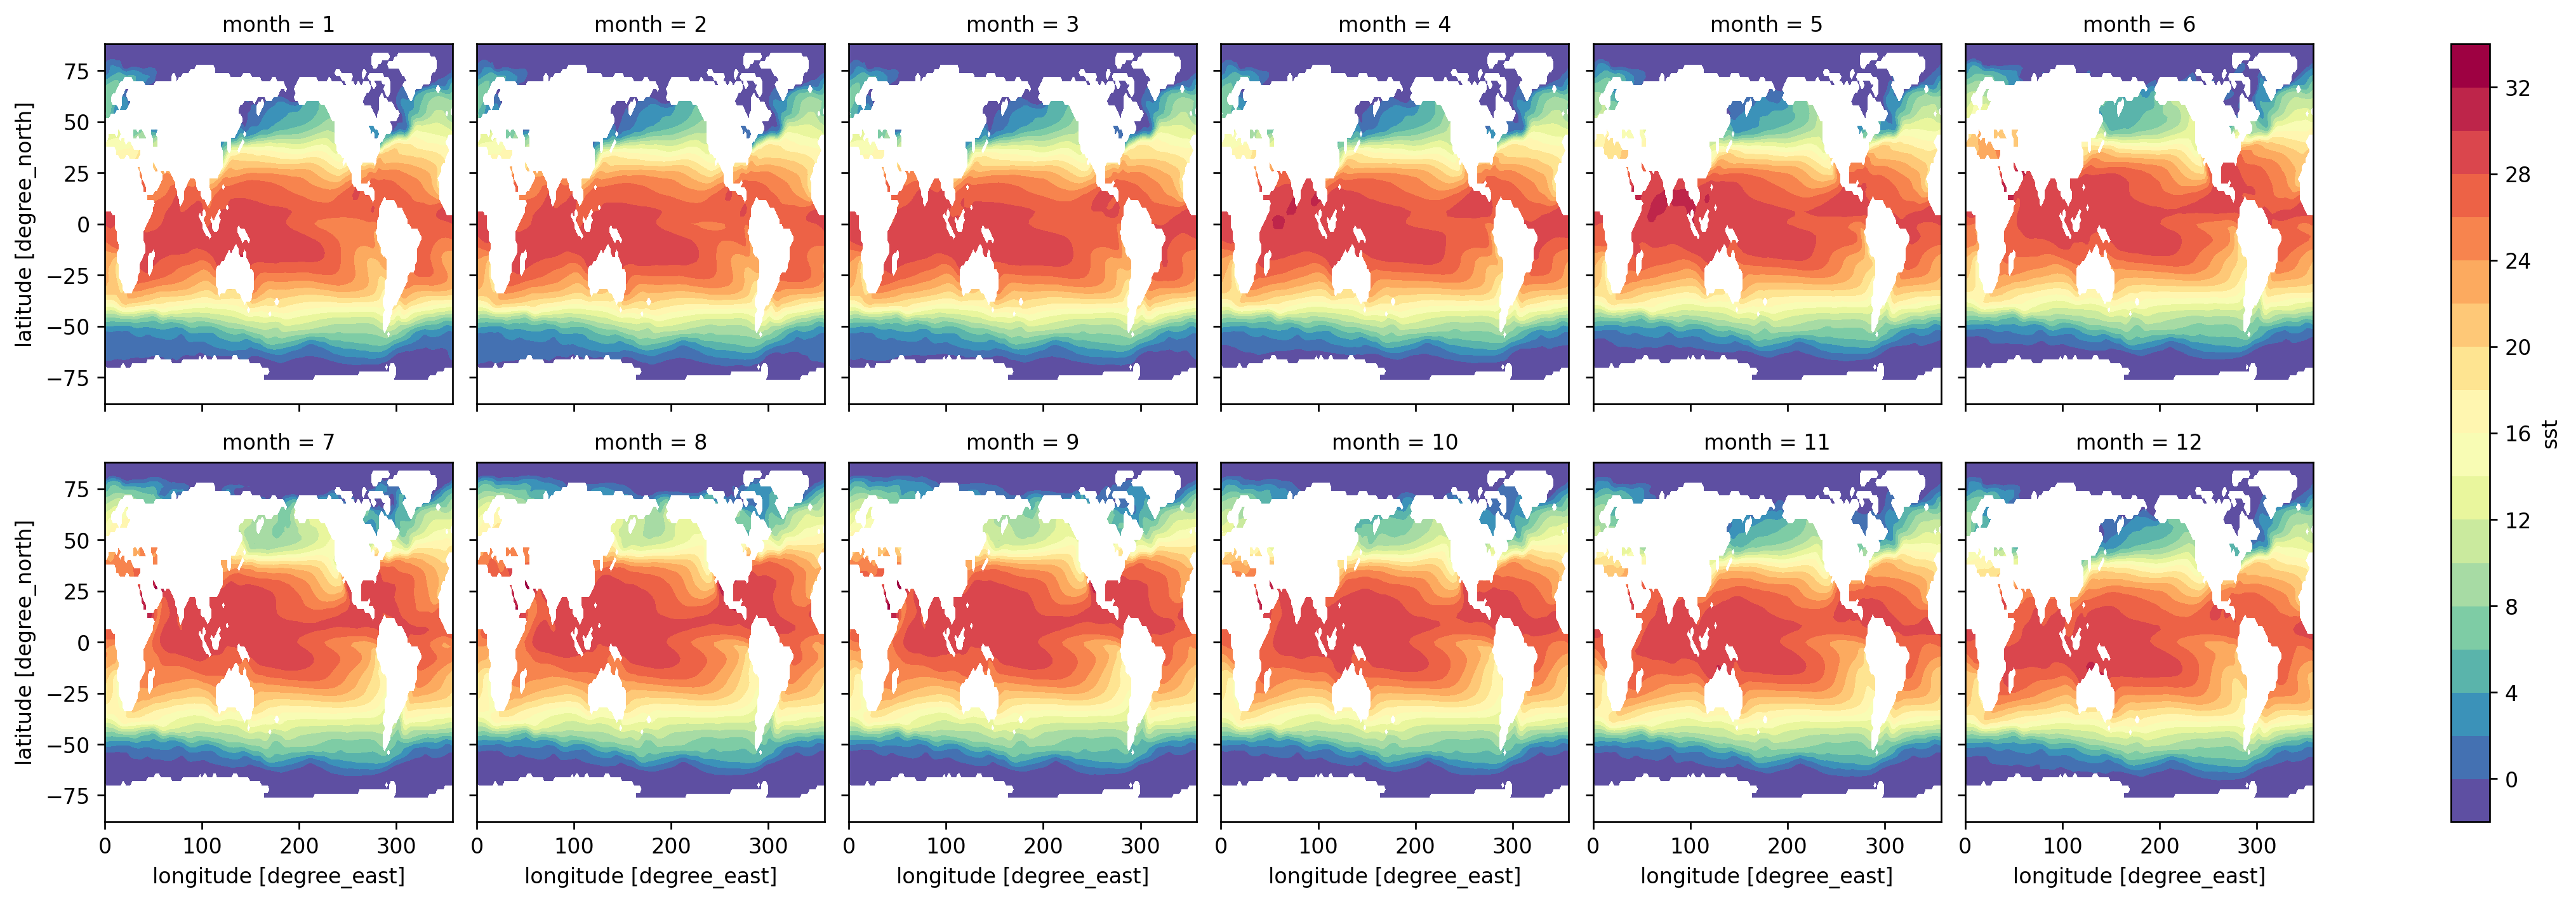

In [20]:
sst_mclim.plot.contourf(col='month', col_wrap=6, levels=20, 
                        cmap='Spectral_r', center=False)

## Calculate monthly anomaly
Subtract the monthly climatology from the raw SST data.

In [21]:
ssta = sst.groupby('time.month') - sst_mclim
# monthly climatology is now removed

In [22]:
ssta

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
...
        [-1.1920929e-07, -3.2286644e-03, -5.0406456e-03, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-9.5143318e-03, -1.1212468e-02, -1.2544036e-02, ...,
         -2.5422573e-03, -5.9720278e-03, -7.7242851e-03],
        [-9.2267990e-03, -9.7885132e-03, -1.0169029e-02, ...,
         -5.8009624e-03, -7.5144768e-03, -8.7165833e-03]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-6.7913532e-04, -3.8850307e-04, -1.1920929e-07, ...,
         -1.1920929e-07, -2.6357174e-04, -6.1130524e-04],
        [-7.9357624e-04, -6.5720081e-04, -2.6142597e-04, ...,
         -3.0875206e-04, -5.3894520e-04, -7.8105927e-04]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

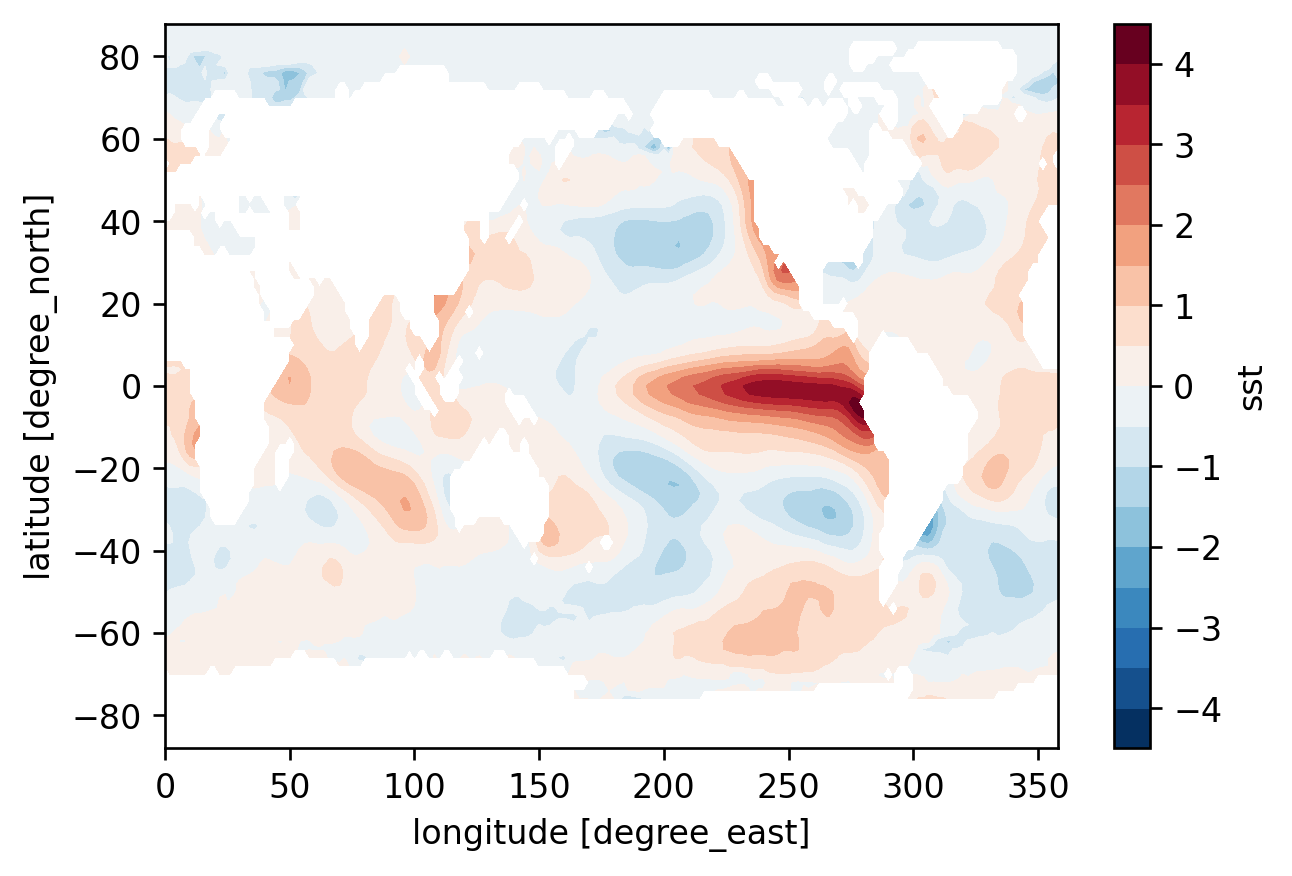

In [23]:
# The 1997 winter is a big El Nino season
ssta.sel(time=slice('1997-12', '1998-02')).mean('time').plot.contourf(levels=19)

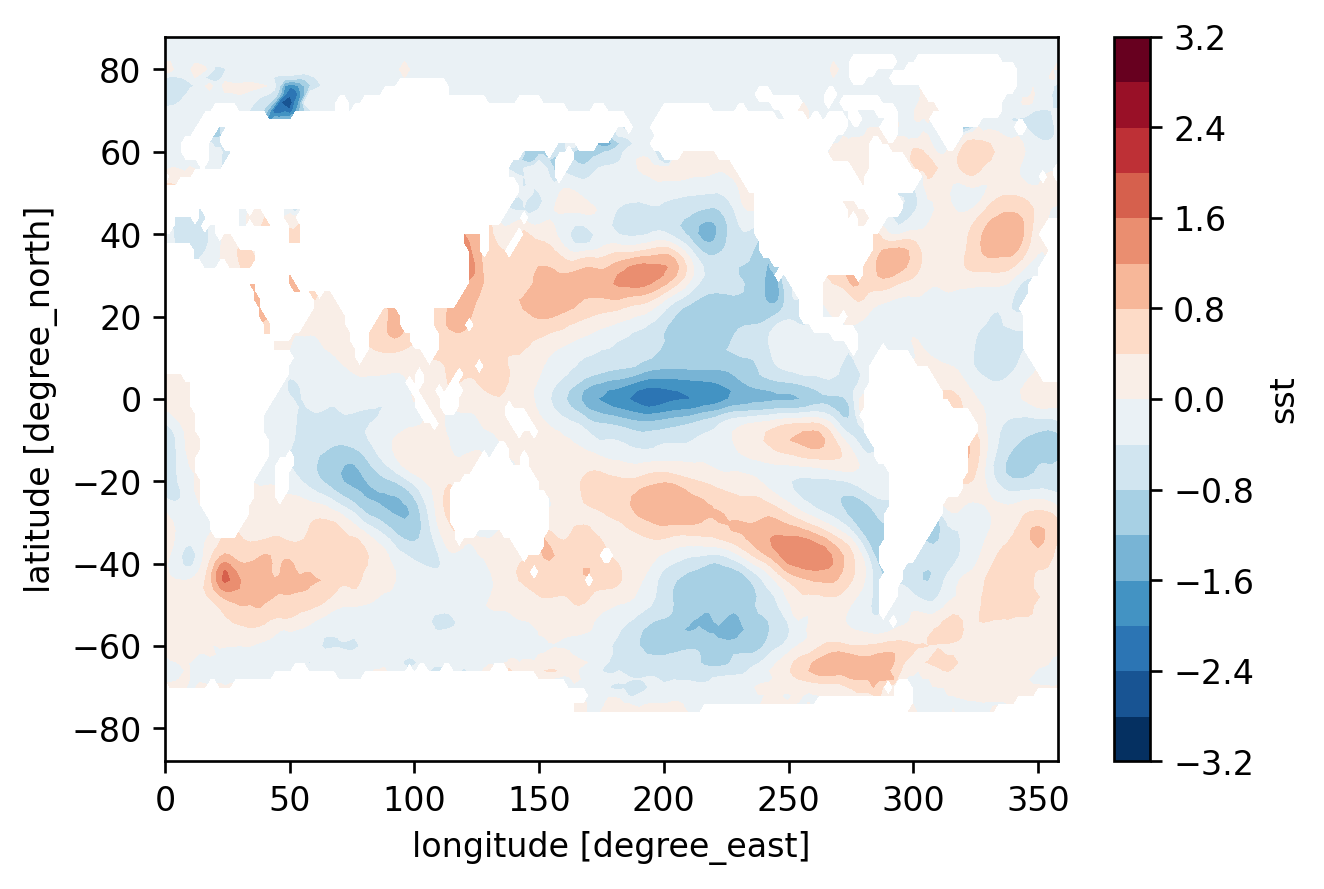

In [24]:
# The 1998 winter is a big La Nina season
ssta.sel(time=slice('1998-12', '1999-02')).mean('time').plot.contourf(levels=19)

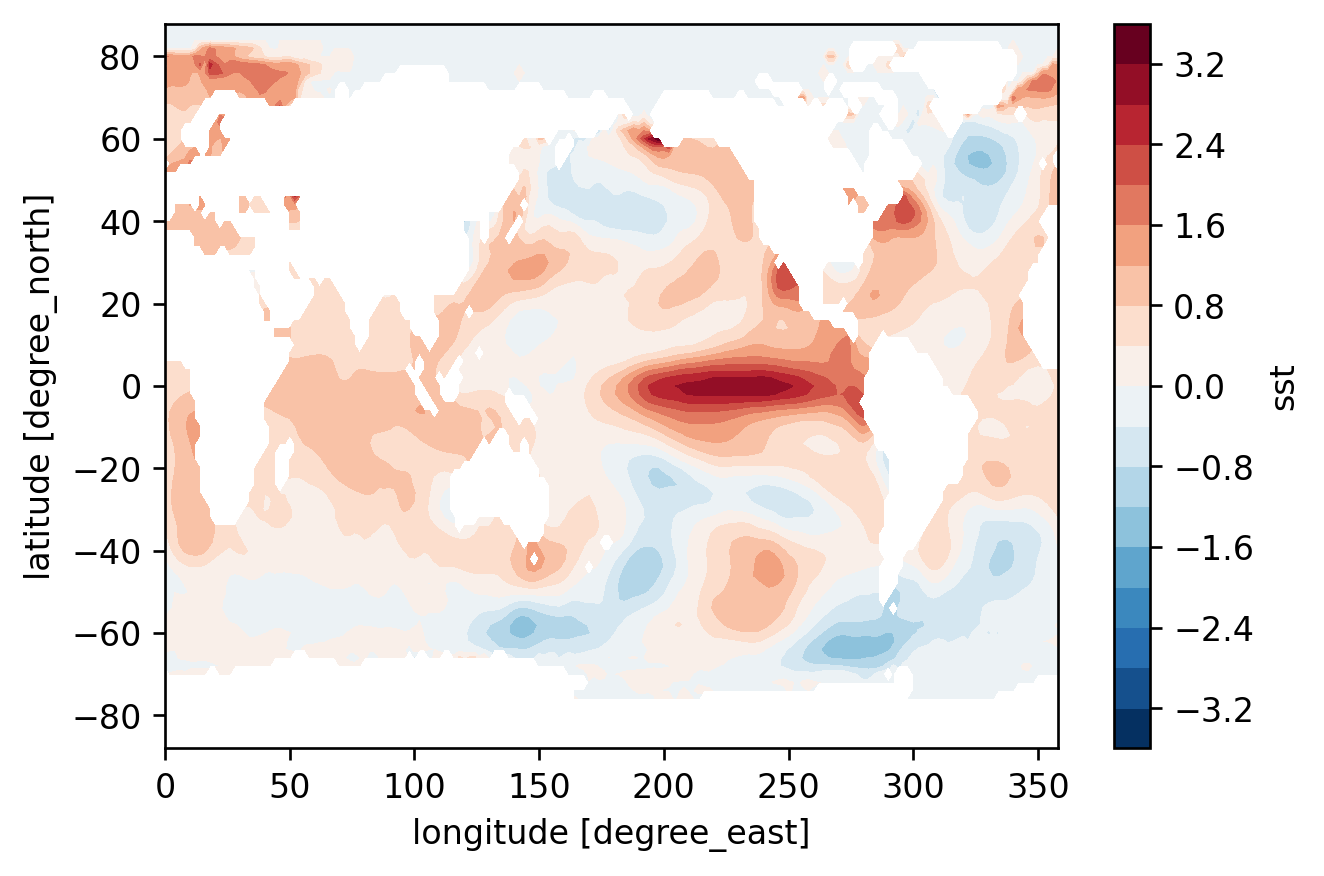

In [25]:
# The 2015 winter is also a big El Nino season
ssta.sel(time=slice('2015-12', '2016-02')).mean('time').plot.contourf(levels=19)

## Calculate the Nino3.4 index
* SST anomaly averaged over the Nino3.4 region: 170W-120W, 5S-5N
![ENSO](http://www.bom.gov.au/climate/enso/indices/oceanic-indices-map.gif)
http://www.bom.gov.au/climate/enso/indices/oceanic-indices-map.gif

In [26]:
nino34 = ssta.sel(lon=slice(360-170,360-120),lat=slice(-5,5)).mean(['lon','lat'])
nino34.attrs['long_name'] = 'Nino3.4 index'

In [27]:
nino34

<xarray.DataArray 'sst' (time: 480)>
array([-1.04900680e-01, -1.82981327e-01,  3.79271880e-02,  1.02511741e-01,
       -1.56986818e-01, -2.13878661e-01, -3.84980589e-01, -9.16783959e-02,
        2.33983338e-01,  1.16299964e-01,  3.04566145e-01,  4.96357203e-01,
        5.66177428e-01,  2.53595203e-01,  7.83962235e-02,  2.09114216e-02,
        1.65222645e-01,  2.91420966e-01,  2.07556952e-02, -3.65579039e-01,
       -3.15712154e-01, -2.53466249e-01, -8.54855329e-02,  2.84164567e-02,
       -3.33171606e-01, -6.02614760e-01, -5.78435421e-01, -4.41379726e-01,
       -4.88844067e-01, -3.81764174e-01, -5.59118807e-01, -5.22406876e-01,
       -2.35358313e-01, -2.97763467e-01, -3.94616067e-01, -2.15333968e-01,
        1.56619325e-01, -1.26914948e-01,  1.85399741e-01,  2.95923799e-01,
        5.35673141e-01,  6.08795702e-01,  4.48002100e-01,  7.32922375e-01,
        1.44802785e+00,  1.97870481e+00,  1.92627609e+00,  2.17196774e+00,
        2.36158586e+00,  1.96175349e+00,  1.42730427e+00,  1.03574896e+00,
        9.88953352e-01,  6.29534662e-01, -1.97548345e-02, -2.45766759e-01,
       -5.52735507e-01, -1.14381588e+00, -1.26753747e+00, -1.04204881e+00,
       -6.42956257e-01, -1.56747371e-01, -4.61359173e-01, -5.92787027e-01,
       -6.51417553e-01, -8.22249234e-01, -4.28176045e-01, -2.39528924e-01,
       -3.80766124e-01, -6.75847292e-01, -1.16851592e+00, -1.35727656e+00,
       -1.12902832e+00, -6.89546764e-01, -7.34117508e-01, -1.08534360e+00,
       -9.41993594e-01, -8.35659027e-01, -6.60370827e-01, -5.49420297e-01,
...
        3.38472098e-01,  2.61887074e-01,  1.68515474e-01, -2.75554210e-01,
       -4.97084290e-01, -4.83319312e-01, -2.04805434e-01, -1.70178846e-01,
       -3.27110559e-01, -3.59871030e-01, -3.20950657e-01, -3.80554438e-01,
       -2.30542362e-01, -2.09253475e-01, -1.38686135e-01, -2.06214979e-01,
       -4.76016909e-01, -5.97726822e-01, -2.38656268e-01,  1.58438459e-01,
        3.86419833e-01,  2.90219992e-01,  8.36944557e-04, -3.28716263e-02,
        2.31316730e-01,  4.24140334e-01,  7.49024451e-01,  6.81629837e-01,
        5.40025949e-01,  4.66240525e-01,  5.33091247e-01,  7.78923273e-01,
        9.95902777e-01,  1.24814522e+00,  1.52608073e+00,  1.92614651e+00,
        2.15197659e+00,  2.35080457e+00,  2.71775723e+00,  2.63437271e+00,
        2.58447456e+00,  2.27873635e+00,  1.67325842e+00,  9.90715742e-01,
        3.94458622e-01,  5.84407821e-02, -3.88212562e-01, -5.55807173e-01,
       -6.04830086e-01, -7.31975555e-01, -7.34857500e-01, -5.19446015e-01,
       -3.96952122e-01, -5.30423373e-02,  8.23768601e-02,  2.86082298e-01,
        4.33291554e-01,  4.06300545e-01,  3.33628446e-01, -1.46758303e-01,
       -4.73812044e-01, -5.67844987e-01, -9.50382292e-01, -1.01649618e+00,
       -9.64271903e-01, -7.61266887e-01, -7.58066595e-01, -4.35995132e-01,
       -1.26900762e-01,  1.22105628e-01,  2.05426410e-01,  1.05248615e-01,
        4.28478599e-01,  8.99333298e-01,  9.17508781e-01,  8.60169709e-01],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Nino3.4 index

Text(1982-12, 2, '1982-12')

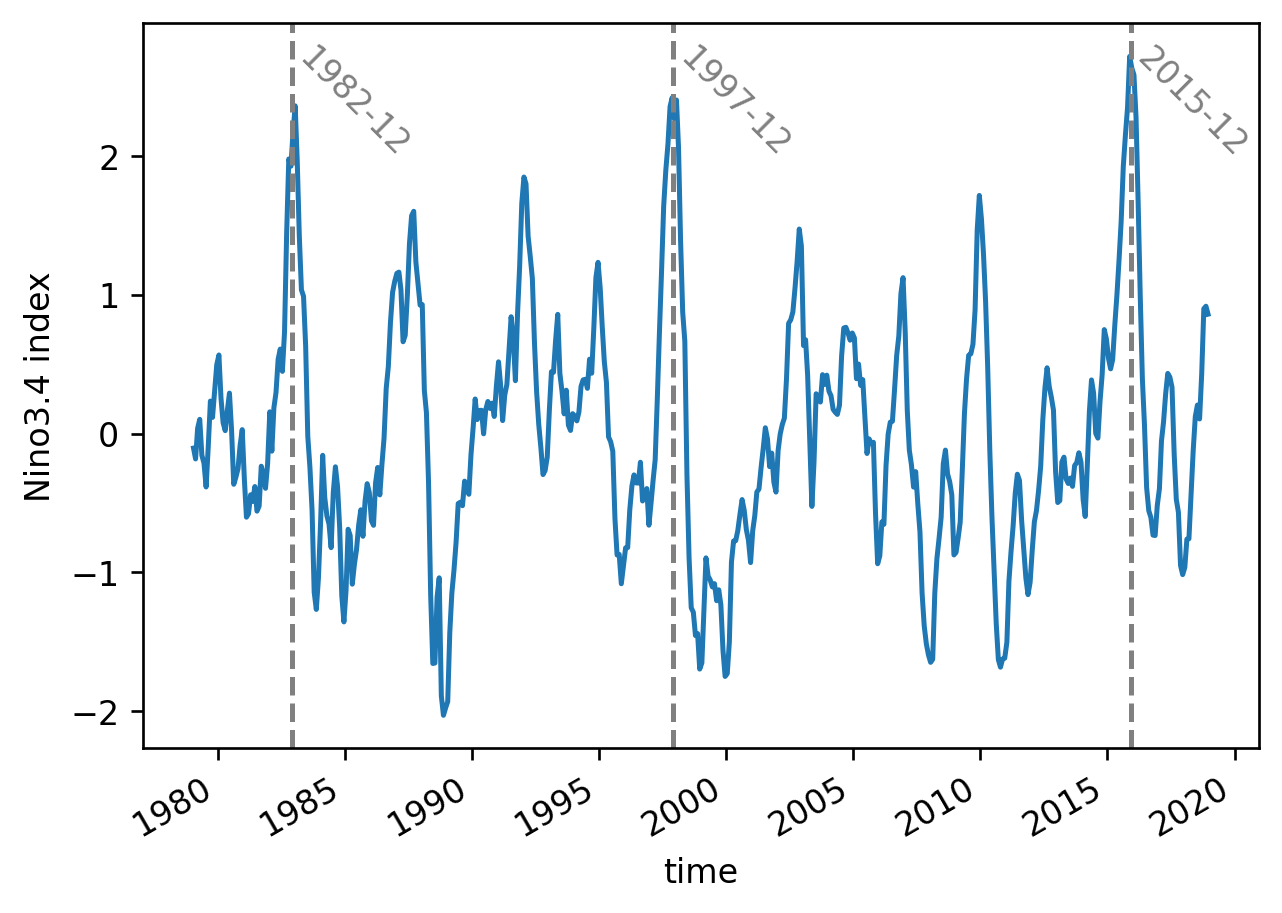

In [28]:
nino34.plot()
plt.axvline('2015-12', color='gray', ls='--')
plt.text('2015-12', 2, '2015-12', rotation=-45, color='gray', )
plt.axvline('1997-12', color='gray', ls='--')
plt.text('1997-12', 2, '1997-12', rotation=-45, color='gray', )
plt.axvline('1982-12', color='gray', ls='--')
plt.text('1982-12', 2, '1982-12', rotation=-45, color='gray', )

## Seasonality of El Nino/La Nina

/Users/wenchang/miniconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:2978: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


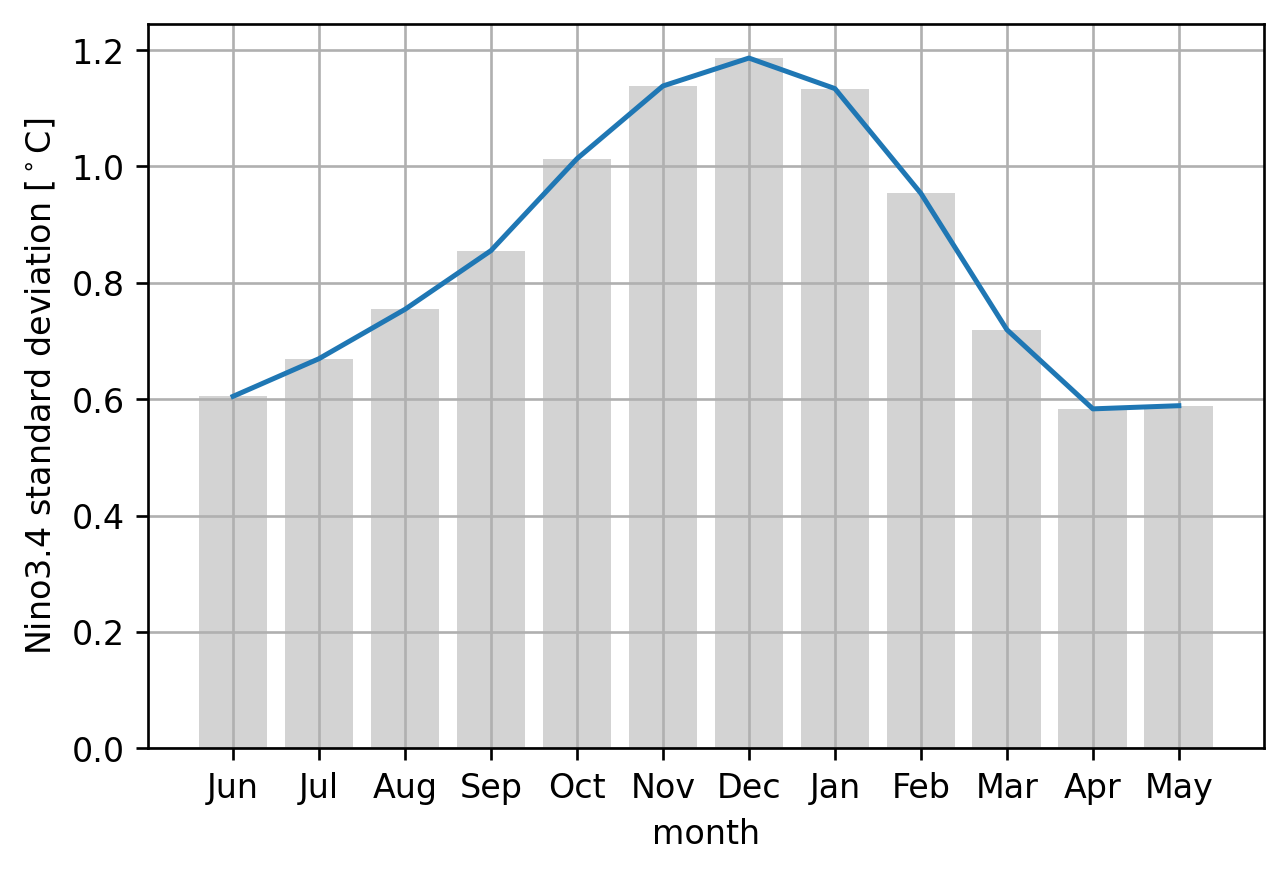

In [29]:
# compare Nino3.4 index variability for each month
da = nino34.groupby('time.month').std('time') # standard deviation for each month
da = da.roll(month=-5).assign_coords(month=range(6, 18)) # roll the time series to start from Jun
da.plot()
plt.bar(da.month, da.values, color='lightgray')
plt.ylabel('Nino3.4 standard deviation [$^\circ$C]')
plt.xticks(range(6,18), ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'])
plt.grid(True)

December shows the largest variability!